# Pymaceuticals Inc.
---

### Analysis

1) In the following summary, we have seen there are total 10 drug used for the treatment in the tumor where the Capomulin used the most and Propriva used on least number of mice as depecited by bar chart.

2) In the reference to the "Capomulin treatment of mouse l509", it increases with the treatment in the first couple of days then there was a sharp decline after the 20th day & littel increase seen as the time past beyond 40 days. Might be another set of data needed how much was the dose each and every time administered. Does size related to the dose or number of days past.

3) In the advanced_summary_stats_agg_df statistics we have seen the Capomulin and Ramicane are the successful drugs and have shown the final tumor volume trended lower but the we need to consider the other factors and variables as well such as age and before health and after health, number of doses etc.

4) Finally, we can say for the Capomulin drug as the average weight and final tumor volume, the value of correlation and r-squared is 0.84 and 0.71 respectively, there is strong positive correlation between the two values and final tumor volume could be perdicted by using average weight of a mouse for the mouse who are on the Capomulin drug.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_study_df = pd.merge(study_results,mouse_metadata,on='Mouse ID', how='left')

# Display the data table for preview
merge_mouse_study_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
unique_number_of_mice = merge_mouse_study_df["Mouse ID"].nunique()
unique_number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_by_timepoint = merge_mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])
duplicated_mice_id = merge_mouse_study_df.loc[duplicated_mice_by_timepoint,'Mouse ID'].unique()
duplicated_mice_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_id_data = merge_mouse_study_df.loc[merge_mouse_study_df['Mouse ID'] == duplicated_mice_id[0]]
duplicated_mice_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_mouse_study_df = merge_mouse_study_df.drop(duplicated_mice_id_data.index)
final_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
final_unique_number_of_mice = final_mouse_study_df["Mouse ID"].nunique()
final_unique_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_volume = final_mouse_study_df["Tumor Volume (mm3)"].groupby(final_mouse_study_df["Drug Regimen"]).mean()
median_tumor_volume = final_mouse_study_df["Tumor Volume (mm3)"].groupby(final_mouse_study_df["Drug Regimen"]).median()
variance_tumor_volume = final_mouse_study_df["Tumor Volume (mm3)"].groupby(final_mouse_study_df["Drug Regimen"]).var()
std_dev_tumor_volume = final_mouse_study_df["Tumor Volume (mm3)"].groupby(final_mouse_study_df["Drug Regimen"]).std()
sem_tumor_volume = final_mouse_study_df["Tumor Volume (mm3)"].groupby(final_mouse_study_df["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                                 "Median Tumor Volume":median_tumor_volume,
                                 "Tumor Volume Variance":variance_tumor_volume,
                                 "Tumor Volume Std. Dev.":std_dev_tumor_volume,
                                 "Tumor Volume Std. Err.":sem_tumor_volume
                                })

# Display Summary statistics dataframe
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats_agg_df = final_mouse_study_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])

# Display summary statistics using aggregation 
advanced_summary_stats_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

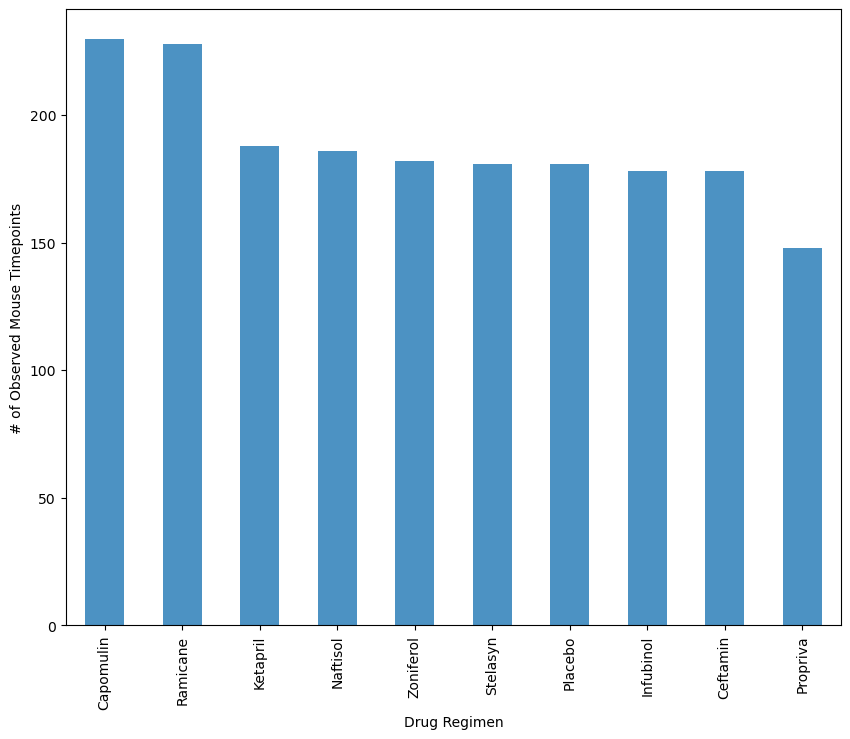

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = final_mouse_study_df['Drug Regimen'].value_counts().plot(kind='bar',figsize=(10,8),alpha=0.8, align='center')
bar_chart_pandas.set_xlabel("Drug Regimen")
bar_chart_pandas.set_ylabel("# of Observed Mouse Timepoints")

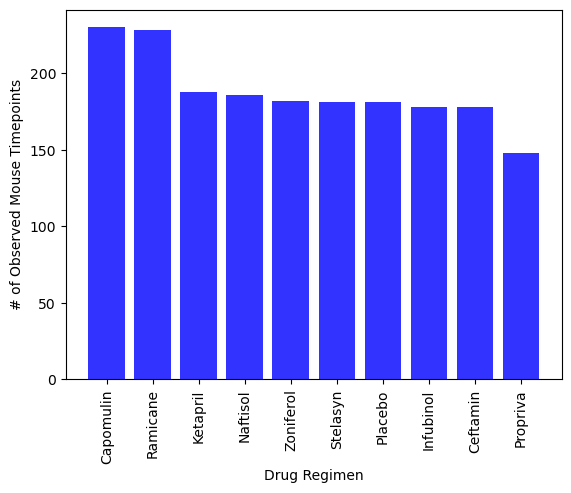

<Figure size 800x600 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
observable_mice_count = final_mouse_study_df['Drug Regimen'].value_counts()
x_axis = observable_mice_count.index.values
y_axis = observable_mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.figure(figsize=(8,6))
plt.show()


Text(0, 0.5, 'Sex')

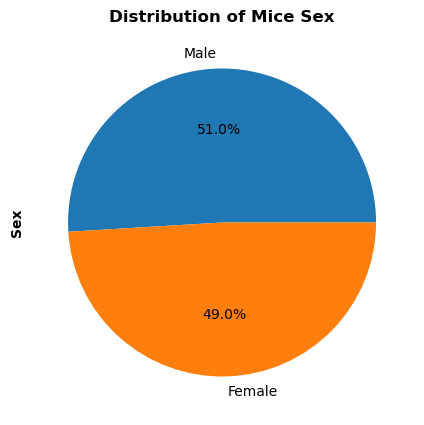

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_mice_sex_pie_chart = final_mouse_study_df['Sex'].value_counts().plot(kind='pie',figsize=(5,5),autopct="%1.1f%%")
pd_mice_sex_pie_chart.set_title(label='Distribution of Mice Sex',fontweight='bold')
pd_mice_sex_pie_chart.set_ylabel('Sex',fontweight='bold')

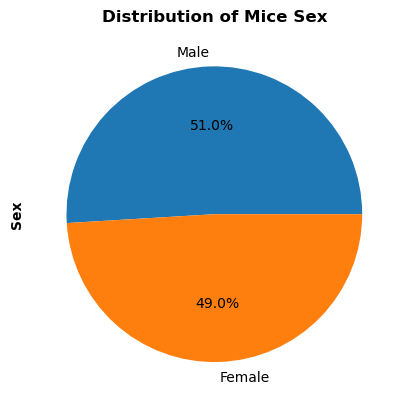

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels_of_pie_chart = final_mouse_study_df['Sex'].value_counts().index
values_of_pie_chart = final_mouse_study_df['Sex'].value_counts().values

plt.pie(values_of_pie_chart,labels=labels_of_pie_chart, autopct='%1.1f%%')
plt.title('Distribution of Mice Sex', fontweight='bold')
plt.ylabel('Sex', fontweight='bold')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = final_mouse_study_df.loc[final_mouse_study_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = final_mouse_study_df.loc[final_mouse_study_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = final_mouse_study_df.loc[final_mouse_study_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = final_mouse_study_df.loc[final_mouse_study_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last_timepoint = capomulin_df.groupby(["Drug Regimen","Mouse ID"]).max()['Timepoint']
capomulin_tumor_volume_df = pd.DataFrame(capomulin_last_timepoint)

ramicane_last_timepoint = ramicane_df.groupby(["Drug Regimen","Mouse ID"]).max()['Timepoint']
ramicane_tumor_volume_df = pd.DataFrame(ramicane_last_timepoint)

infubinol_last_timepoint = infubinol_df.groupby(["Drug Regimen","Mouse ID"]).max()['Timepoint']
infubinol_tumor_volume_df = pd.DataFrame(infubinol_last_timepoint)

ceftamin_last_timepoint = ceftamin_df.groupby(["Drug Regimen","Mouse ID"]).max()['Timepoint']
ceftamin_tumor_volume_df = pd.DataFrame(ceftamin_last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge_df = pd.merge(capomulin_tumor_volume_df, capomulin_df, on=("Mouse ID","Timepoint"), how="left")
ramicane_merge_df = pd.merge(ramicane_tumor_volume_df, ramicane_df, on=("Mouse ID","Timepoint"), how="left")
infubinol_merge_df = pd.merge(infubinol_tumor_volume_df, infubinol_df, on=("Mouse ID","Timepoint"), how="left")
ceftamin_merge_df = pd.merge(ceftamin_tumor_volume_df, ceftamin_df, on=("Mouse ID","Timepoint"), how="left")


In [14]:
capomulin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [15]:
ramicane_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [16]:
infubinol_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [17]:
ceftamin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

tumor_vol = final_mouse_study_df.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_vol_df = tumor_vol.reset_index()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Put treatments into a list for for loop (and later for plot labels)
for drug in drug_regimen_list:
    
    # Using the same variable tumor_vol and updated it with rows which contain mice on each drug and get the tumor volumes
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add tumor_vol to the list where the above condition satisfied
    tumor_vol_list.append(tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    mean_tumor_vol = tumor_vol.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Calculate the outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results to the terminal
    print(f"{drug} Regimen")
    print("--------------------------------------------------------------------------------------")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"Tumor Volume (mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Tumor Volume (mm3) for {drug} below {round(upper_bound,2)} could be outliers.")
    print(f"Average Tumor Volume (mm3) for {drug} is: {round(mean_tumor_vol,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for outlier in outliers.index:
            print(f"Outlier Tumor Volume (mm3) is {round(outliers[outlier],2)}")
    print("--------------------------------------------------------------------------------------")
    print("")
   

Capomulin Regimen
--------------------------------------------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Tumor Volume (mm3) for Capomulin below 20.7 could be outliers.
Tumor Volume (mm3) for Capomulin below 51.83 could be outliers.
Average Tumor Volume (mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
--------------------------------------------------------------------------------------

Ramicane Regimen
--------------------------------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Tumor Volume (mm3) for Ramicane below 17.91 could be outliers.
Tumor Volume (mm3) for Ramicane below 54.31 could be outliers.
Average Tumor Volume (mm3) for Ramicane is: 36.19
Numb

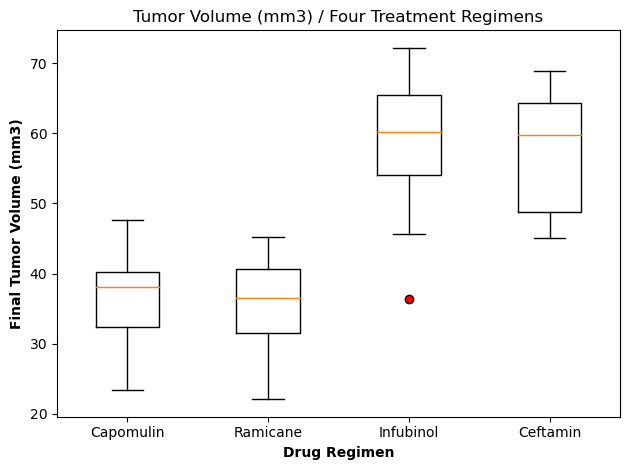

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol_list, labels=drug_regimen_list, flierprops={'markerfacecolor':'r'})

tumor_plot.set_title('Tumor Volume (mm3) / Four Treatment Regimens')
tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

plt.tight_layout()
plt.show()


## Line and Scatter Plots

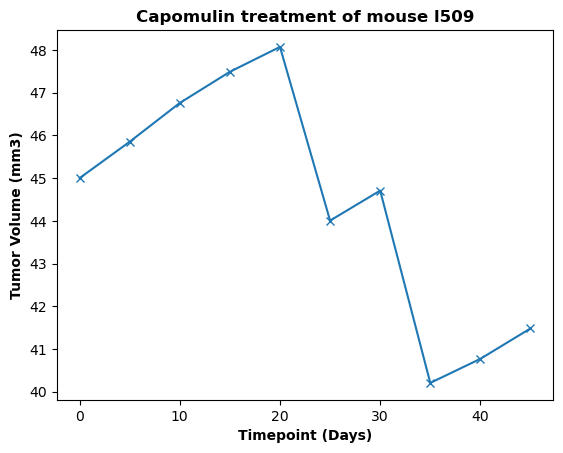

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_1509_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]
mouse_1509_plot = plt.plot(mouse_1509_df['Timepoint'], mouse_1509_df['Tumor Volume (mm3)'], marker='x')
plt.title(f"Capomulin treatment of mouse {mouse_id}", fontweight='bold')
plt.xlabel("Timepoint (Days)", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')

plt.show()
                 
                 

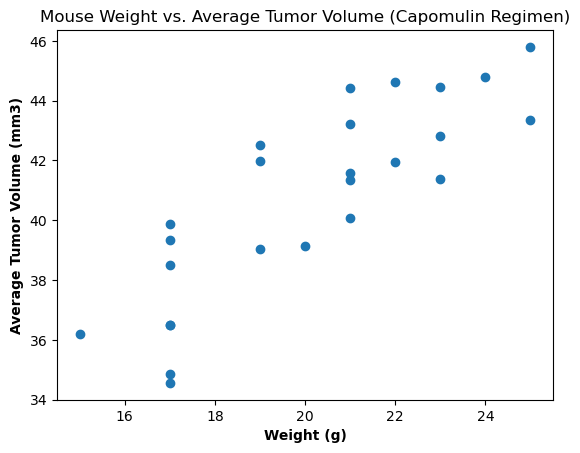

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_group_by_df = capomulin_df.groupby('Mouse ID')
mice_weight_average = capomulin_group_by_df['Weight (g)'].mean()
mice_tumor_volume_average = capomulin_group_by_df['Tumor Volume (mm3)'].mean()

# Generate the scatter plot 
scatter_weight_tumor = plt.scatter(mice_weight_average,mice_tumor_volume_average)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor volume for Capomulin regimen is 0.84
The value of r-squared is 0.71


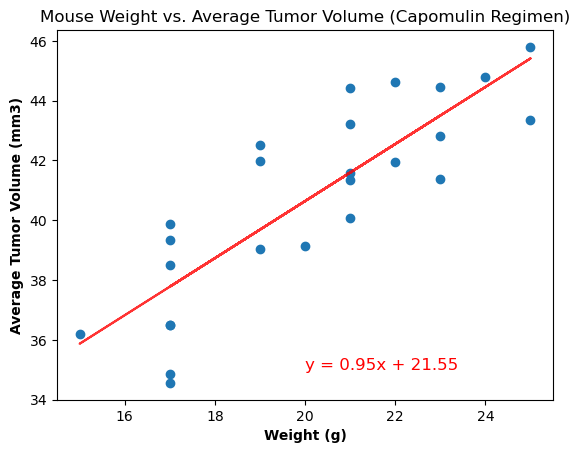

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Setting x_values and y_values
x_values = mice_weight_average
y_values = mice_tumor_volume_average

# Calculate the correlation coefficient 
correlation_weight_tumor_volume = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and tumor volume for Capomulin regimen is {round(correlation_weight_tumor_volume[0],2)}")

# Calculate the linear regression values
(slope, intercept, rvalue,pvalue,stderr) = st.linregress(x_values,y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The value of r-squared is {r_squared}")

# Line equation y = mx + b 
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.8)

# To show the line equation on plot
plt.annotate(line_equation,xy=(20,35), fontsize=12, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
plt.show()